# Red Wine Quality Prediction Project

*Statement Problem:To Determine which physiochemical properties (Variable inputs) makes a good wine*

In [1]:
### importing libraries to use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [2]:
#Import and Read the Dataset
red_wine=pd.read_csv("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv")

In [3]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Observation:
This dataset contain the physiochemical constituent of a Portuguese "Vinho Verde" wine(red and white variants), prsentented in numerical data. The "quality" is the target variable with  range from (0-10) categories which are to be use to predict and classify the wine quality into "good=1 (7 and above)" or "not good= 0 (below 7)"

In [4]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check for missing values
red_wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset cotains 1599 rows and 12 columns of which 1 is target variable and the remaining 11 independent variables. This data has two data types (Floats and integer), 11 of the features are floats and  1 is integer; and no Null values. Below I have listed the features with a short description:

Data Analysis and Visualization:

In [6]:
#Statistical interpretation of the Dataset
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


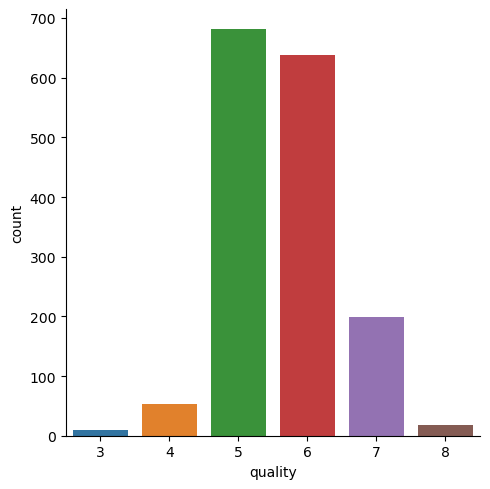

In [7]:
#Checking the level of quality values according to the data set

sns.catplot(x='quality', data = red_wine, kind = 'count')


In [8]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The data shows that the numbers of quality wine produced by the composition of the various components. Based on the dataset, Less quality wine are produces by the component proportion present.

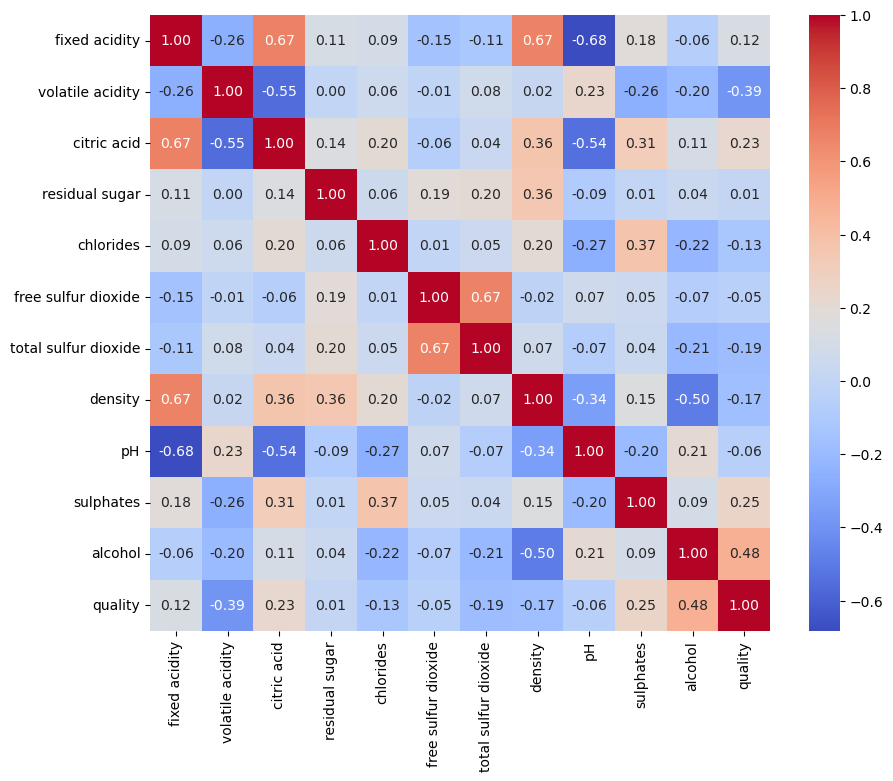

In [9]:
#find the contribution of each component to the quality of the wine
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [10]:
cor_red =red_wine.corr()
cor_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
cor_red['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The Analysis shows that from the 11 independant variables, 5 of the independent variables show positive correlation while the remaining 6 have negative correlation 

In [12]:
cor_red.skew()

fixed acidity           0.355827
volatile acidity        1.555113
citric acid             0.029210
residual sugar          2.530042
chlorides               1.772707
free sulfur dioxide     1.981979
total sulfur dioxide    1.737686
density                 0.521919
pH                      1.150332
sulphates               1.490640
alcohol                 1.308154
quality                 1.396972
dtype: float64

Data Preprocessing:
    

In [13]:
from sklearn.model_selection import train_test_split
# Define input features and target variable
x = red_wine.drop('quality', axis=1)
y =red_wine['quality']

In [14]:
# Feature scaling using standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


In [15]:
#finding variance inflation factor in each scaled colunm i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF Values,Features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


In [16]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [17]:
# Create binary target variable
y = y.apply(lambda x: 1 if x >= 7 else 0)

In [18]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [19]:
#Oversampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)



Spliting the data into Train and Test Dataset

In [20]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

Model Training and Evaluation:

1. Stochastic Gradient Descent (SGD):

In [21]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(x1_train, y1_train)
Y_pred = sgd.predict(x1_test)

sgd.score(x1_train, y1_train)

acc_sgd = round(sgd.score(x1_train, y1_train) * 100, 2)

acc_sgd


75.26

2. Random Forest:

In [22]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x1_train, y1_train)

Y_pred = random_forest.predict(x1_test)

random_forest.score(x1_train, y1_train)
acc_random_forest = round(random_forest.score(x1_train, y1_train) * 100, 2)
acc_random_forest 

100.0

3. Logistic Regression:

In [23]:
logreg = LogisticRegression()
logreg.fit(x1_train, y1_train)

Y_pred = logreg.predict(x1_test)

acc_log = round(logreg.score(x1_train, y1_train) * 100, 2)
acc_log

80.05

4. K Nearest Neighbor:

In [24]:
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x1_train, y1_train) 
Y_pred = knn.predict(x1_test) 
acc_knn = round(knn.score(x1_train, y1_train) * 100, 2)
acc_knn

95.16

5. Gaussian Naive Bayes:

In [25]:
gaussian = GaussianNB() 
gaussian.fit(x1_train, y1_train)
Y_pred =gaussian.predict(x1_test) 
acc_gaussian = round(gaussian.score(x1_train, y1_train) * 100, 2)
acc_gaussian

77.39

6. Perceptron:

In [26]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x1_train, y1_train)

Y_pred = perceptron.predict(x1_test)

acc_perceptron = round(perceptron.score(x1_train, y1_train) * 100, 2)
acc_perceptron

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


80.69

7. Linear Support Vector Machine:

In [27]:
linear_svc = LinearSVC()
linear_svc.fit(x1_train, y1_train)

Y_pred = linear_svc.predict(x1_test)

acc_linear_svc = round(linear_svc.score(x1_train, y1_train) * 100, 2)
acc_linear_svc

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.05

8. Decision Tree:

In [28]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x1_train, y1_train)  
Y_pred = decision_tree.predict(x1_test)  
acc_decision_tree = round(decision_tree.score(x1_train, y1_train) * 100, 2)
acc_decision_tree

100.0

Which is the best Model?

In [29]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
95.16,KNN
80.69,Perceptron
80.05,Support Vector Machines
80.05,Logistic Regression
77.39,Naive Bayes
75.26,Stochastic Gradient Decent


As we can see, the Random Forest classifier and Decision gives 100% scores. But first, checking how random-forest performs and lead using cross validation.

In [30]:
#cross validation for Random forest
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x1_train, y1_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95495495 0.94570136 0.9638009  0.9321267  0.95927602 0.93665158
 0.90497738 0.95022624 0.94117647 0.92760181]
Mean: 0.9416493416493417
Standard Deviation: 0.016511999021696443


In [31]:
#cross validation for Decision Tree
from sklearn.model_selection import cross_val_score
rf = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(rf, x1_train, y1_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.88738739 0.87330317 0.91855204 0.8959276  0.89140271 0.90950226
 0.86877828 0.90950226 0.91402715 0.87782805]
Mean: 0.8946210916799153
Standard Deviation: 0.016914153680904976


The Mean Score for Random forest Classifier Model is 94% while that of the Decision Tree is 90.00%.Hence the Random forest give more accurate prediction.  

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       291
           1       0.86      0.90      0.88       262

    accuracy                           0.88       553
   macro avg       0.88      0.89      0.88       553
weighted avg       0.89      0.88      0.88       553

ROC AUC: 0.9882413892605125


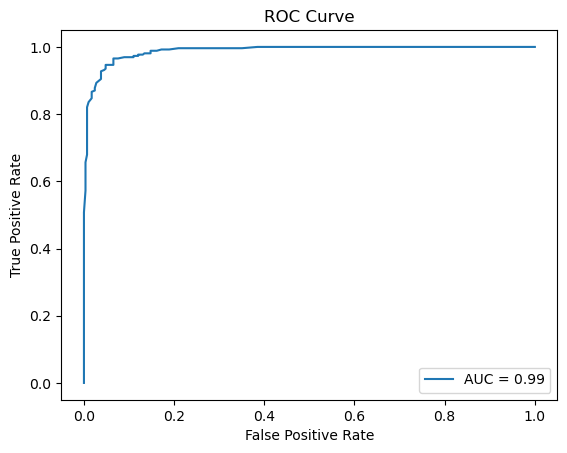

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

# Initialize the model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x1_train, y1_train)
# Print the classification report
print(classification_report(y1_test, Y_pred))

# Calculate the AUC value
Y_pred_proba = random_forest.predict_proba(x1_test)[:, 1]
roc_auc = roc_auc_score(y1_test, Y_pred_proba)
print(f'ROC AUC: {roc_auc}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y1_test, Y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [34]:
# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')



In [35]:
# Fit GridSearchCV
grid_search.fit(x1_train, y1_train)

# Print the best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best ROC AUC Score: {grid_search.best_score_}')



Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best ROC AUC Score: 0.9200572403304668


              precision    recall  f1-score   support

           0       0.90      0.81      0.86       291
           1       0.81      0.90      0.86       262

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.86      0.86      0.86       553

ROC AUC: 0.8935101387686577


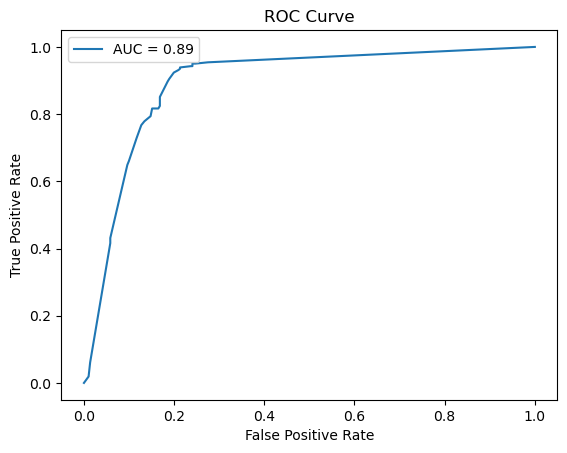

In [36]:
# Use the best model
best_model = grid_search.best_estimator_

# Predict the test set using the best model
y_pred_best = best_model.predict(x1_test)
y_pred_best_proba = best_model.predict_proba(x1_test)[:, 1]

# Print the classification report
print(classification_report(y1_test, y_pred_best))

# Calculate the AUC value
roc_auc_best = roc_auc_score(y1_test, y_pred_best_proba)
print(f'ROC AUC: {roc_auc_best}')

# Plot ROC curve
fpr_best, tpr_best, thresholds_best = roc_curve(y1_test, y_pred_best_proba)
plt.plot(fpr_best, tpr_best, label=f'AUC = {roc_auc_best:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The ROC Curve final model shows the AUC score for the model to be of 89%

